<a href="https://colab.research.google.com/github/Carvas91/Carlos_Vasconez_portfolio/blob/main/DL_practice1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
from collections import Counter
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib.colors import LogNorm
from sklearn.metrics import f1_score

In [3]:
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
  strat = df[stratify] if stratify else None
  train_set, test_set = train_test_split(
      df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
  strat = test_set[stratify] if stratify else None
  val_set, test_set = train_test_split(
      test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
  return train_set, val_set, test_set

In [4]:
def remove_labels(df, label_name):
  X= df.drop(label_name, axis=1)
  y= df[label_name]
  return X, y

In [5]:
df = pd.read_csv('/content/creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.shape

(284807, 31)

<Axes: xlabel='Class'>

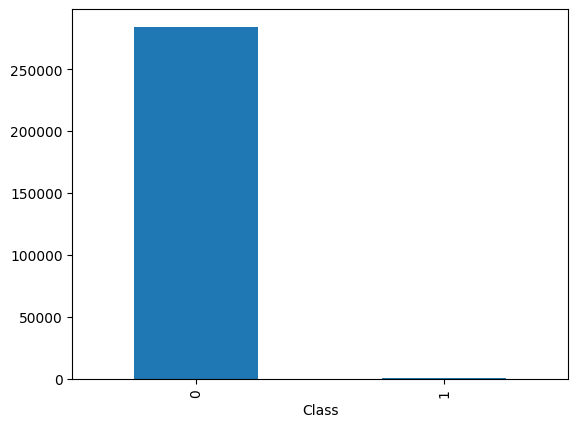

In [7]:
df.Class.value_counts().plot(kind='bar')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [12]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


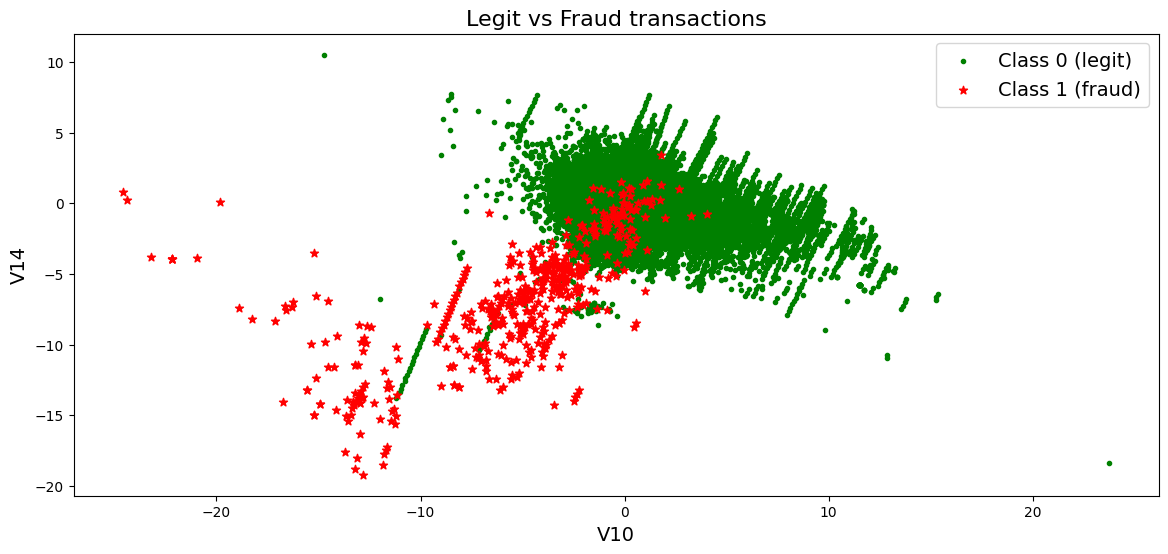

In [23]:
plt.figure(figsize=(14,6))
plt.scatter(df.V10[df.Class==0], df.V14[df.Class==0], c='g', marker=".")
plt.scatter(df.V10[df.Class==1], df.V14[df.Class==1], c='r', marker="*")
plt.title('Legit vs Fraud transactions', fontsize=16)
plt.xlabel('V10', fontsize=14)
plt.ylabel('V14', fontsize=14)
plt.legend(['Class 0 (legit)', 'Class 1 (fraud)'], loc='upper right', fontsize=14)
plt.show()

In [19]:
 df = df.drop(['Time','Amount'], axis=1)

In [20]:
train_set, val_set, test_set = train_val_test_split(df)

In [21]:
X_train, y_train = remove_labels(train_set, 'Class')
X_val, y_val = remove_labels(val_set, 'Class')
X_test, y_test = remove_labels(test_set, 'Class')

In [24]:
X_train_reduced = X_train[['V10', 'V14']].copy()
X_val_reduced = X_val[['V10', 'V14']].copy()
X_test_reduced = X_test[['V10', 'V14']].copy()

In [26]:
X_train_reduced.head(3)

,V10,V14
164406,-0.975273,-0.115675
220383,0.919355,-0.505054
49922,-0.094516,-0.439746


In [27]:
from tensorflow.keras import models
from tensorflow.keras import layers


In [32]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train_reduced.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [33]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy', 'Precision'])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               384       
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 11265 (44.00 KB)
Trainable params: 11265 (44.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
history = model.fit(X_train_reduced, y_train,
                    epochs=30,
                    validation_data=(X_val_reduced, y_val))

Epoch 1/30
5341/5341 [==============================] - 20s 3ms/step - loss: 0.0236 - accuracy: 0.9983 - precision: 0.5205 - val_loss: 0.0041 - val_accuracy: 0.9991 - val_precision: 0.8871
Epoch 2/30
5341/5341 [==============================] - 17s 3ms/step - loss: 0.0042 - accuracy: 0.9992 - precision: 0.8645 - val_loss: 0.0037 - val_accuracy: 0.9994 - val_precision: 0.8861
Epoch 3/30
5341/5341 [==============================] - 17s 3ms/step - loss: 0.0040 - accuracy: 0.9992 - precision: 0.8432 - val_loss: 0.0036 - val_accuracy: 0.9993 - val_precision: 0.8846
Epoch 4/30
5341/5341 [==============================] - 20s 4ms/step - loss: 0.0040 - accuracy: 0.9992 - precision: 0.8306 - val_loss: 0.0036 - val_accuracy: 0.9993 - val_precision: 0.8784
Epoch 5/30
5341/5341 [==============================] - 18s 3ms/step - loss: 0.0039 - accuracy: 0.9992 - precision: 0.8443 - val_loss: 0.0036 - val_accuracy: 0.9993 - val_precision: 0.8784
Epoch 6/30
5341/5341 [==============================] -

In [50]:
def plot_ann_decision_bound(X, y, model, steps=1000):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], steps),
                         np.linspace(mins[1], maxs[1], steps))
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = labels.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap="RdBu", alpha=0.5)

    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'k', markersize=2)
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'r', markersize=2)

    plt.xlabel('V10', fontsize=14)
    plt.ylabel('V14', fontsize=14)
    plt.show()

31250/31250 [==============================] - 59s 2ms/step


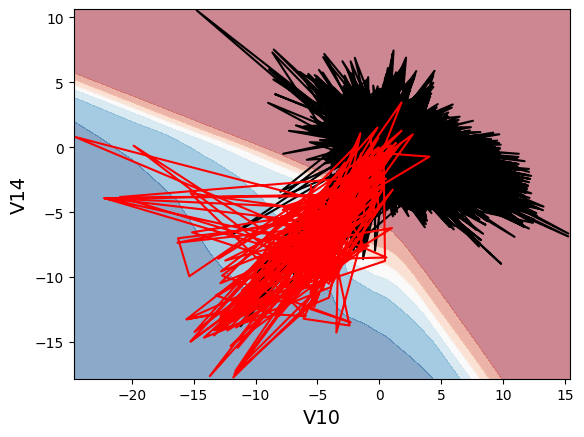

In [51]:
plot_ann_decision_bound(X_train_reduced.values, y_train, model)
plt.show()

In [52]:
y_pred = model.predict(X_test_reduced).round(0)

1781/1781 [==============================] - 9s 5ms/step
